# Model training

David René Langarica Hernández | A01708936

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.19.0


In [45]:
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale=1./255, 
                                    rotation_range = 20,
                                    width_shift_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode ='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode ='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode ='categorical',
)

Found 15120 images belonging to 7 classes.
Found 4200 images belonging to 7 classes.
Found 1680 images belonging to 7 classes.


In [47]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

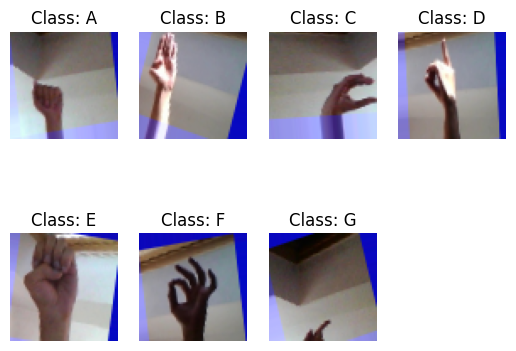

In [48]:
class_examples = {}
num_classes = len(class_names) 

while len(class_examples) < num_classes:
    images, labels = next(train_generator)
    for i in range(len(images)):
        class_idx = np.argmax(labels[i])
        if class_idx not in class_examples and class_idx < num_classes:
            class_examples[class_idx] = images[i]
    
    if len(class_examples) == num_classes:
        break


plt.figure()

for i, class_idx in enumerate(sorted(class_examples.keys())):
    plt.subplot(2, 4, i + 1)
    plt.imshow(class_examples[class_idx])
    plt.title(f'Class: {class_names[class_idx]}')
    plt.axis('off')

plt.show()

In [49]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])


In [50]:
model.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stop]
)

Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.2976 - loss: 1.7319
Epoch 1: val_loss improved from inf to 1.20622, saving model to best_model.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 74s 154ms/step - accuracy: 0.2979 - loss: 1.7312 - val_accuracy: 0.6310 - val_loss: 1.2062
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.6743 - loss: 0.8750
Epoch 2: val_loss improved from 1.20622 to 1.11254, saving model to best_model.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 0.6744 - loss: 0.8748 - val_accuracy: 0.6812 - val_loss: 1.1125
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7958 - loss: 0.5571
Epoch 3: val_loss improved from 1.11254 to 0.90852, saving model to best_model.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 65s 137ms/step - accuracy: 0.7958 - loss: 0.5570 - val_accuracy: 0.7626 - val_loss: 0.9085
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8596 - loss: 0.3901
Epoch 4: val_loss did not improve from 0.90852
473/473 ━━━━━━━━━━━━━━━━━━━━ 63s 133ms/step - accuracy: 0.8596 - loss: 0.3900 - val_accuracy: 0.7624 - val_loss: 1.1387
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8944 - loss: 0.3051
Epoch 5: val_loss improved from 0.90852 to 0.79921, saving model to best_model.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 62s 130ms/step - accuracy: 0.8944 - loss: 0.3050 - val_accuracy: 0.7952 - val_loss: 0.7992
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9168 - loss: 0.2357
Epoch 6: val_loss did not improve from 0.79921
473/473 ━━━━━━━━━━━━━━━━━━━━ 62s 130ms/step - accuracy: 0.9168 - loss: 0.2357 - val_accuracy: 0.7419 - val_loss: 1.6214
Epoch 7/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9316 - loss: 0.1992
Epoch 7: val_loss did not improve from 0.79921
473/473 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - accuracy: 0.9316 - loss: 0.1992 - val_accuracy: 0.7802 - val_loss: 0.9172
Epoch 8/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9381 - loss: 0.1838
Epoch 8: val_loss did not improve from 0.79921
473/473 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - accuracy: 0.9381 - loss: 0.1838 - val_accuracy: 0.7467 - val_loss: 1.5617
Epoch 8: early stopping


In [52]:
test_loss, test_acc = model.evaluate(test_generator)

print('\nTest accuracy:', test_acc)

132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7469 - loss: 1.5364

Test accuracy: 0.746666669845581
